In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.backends.backend_pdf import PdfPages

In [58]:
def line_plot(df, x, y, color, style, show):
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x=x, y=y, hue=color, style=style, ax=ax, errorbar='sd', err_style="band")
    if y == 'silhouette average':
        plt.ylim(-0.3, 0.7)
    if y == 'lisi average':
        plt.ylim(1, 5)
    if 'adjusted rand index' in  y:
        plt.ylim(-0.2, 1)
    if show == True:
        plt.show()
    plt.close(fig)
    return fig

In [ ]:
#input 
sample_name = 'Visium_FFPE_V43T08-041_D'
#Input
table_list = "['../../nf_output/results/Visium_FFPE_V43T08-041_D_ref_final_table.csv', '../../nf_output/results/Visium_FFPE_V43T08-041_D_sim_1_final_table.csv', '../../nf_output/results/Visium_FFPE_V43T08-041_D_sim_2_final_table.csv', '../../nf_output/results/Visium_FFPE_V43T08-041_D_sim_3_final_table.csv', '../../nf_output/results/Visium_FFPE_V43T08-051_A_sim_4_final_table.csv']"

In [60]:
import ast
if isinstance(table_list, str):
    table_list = ast.literal_eval(table_list)

In [61]:
tables = []
for table_name in table_list:
    table = pd.read_csv(table_name)
    suffix = os.path.basename(table_name).replace(sample_name, '').strip('_')
    colname = suffix.replace('_final_table','').replace('.csv','')
    table['dataset'] = colname
    tables.append(table)
table_all = pd.concat(tables, ignore_index=True)

In [62]:
table_test = table_all.loc[table_all['refinement']==False,:]

In [63]:
output = f'{sample_name}_final_graphs.pdf'
metric_list = ['silhouette average', 'lisi average', 'adjusted rand index (uscore label)', 'adjusted rand index (sctype + uscore label)']

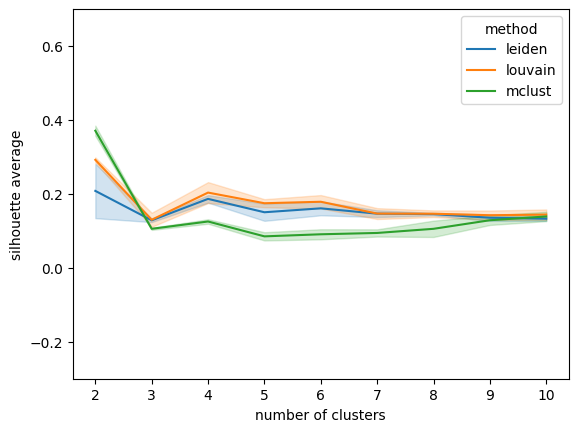

Figure(640x480)


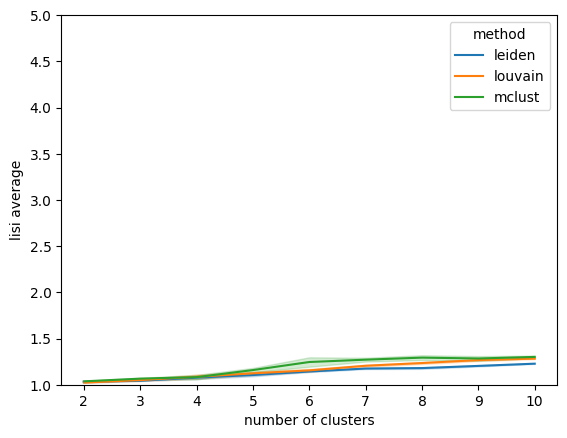

Figure(640x480)


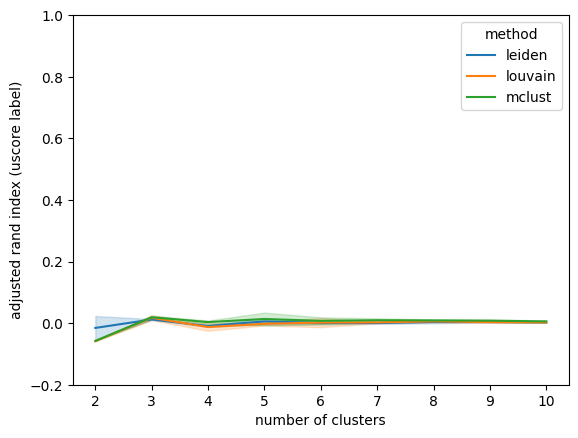

Figure(640x480)


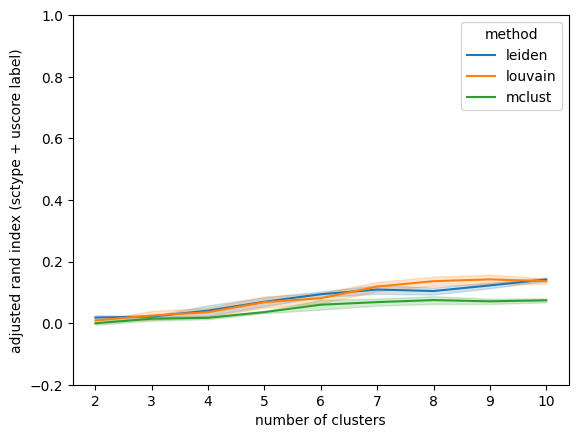

Figure(640x480)


In [64]:
with PdfPages(output) as pdf:
    for metric in metric_list:
        fig = line_plot(table_test, 'number of clusters', metric, 'method', None, show=True)
        print(fig)
        pdf.savefig(fig)

In [67]:
table_test

,method,refinement,number of clusters,silhouette average,lisi average,adjusted rand index (uscore label),adjusted rand index (sctype + uscore label),dataset
0,leiden,False,10,0.128,1.229,0.005,0.148,ref
2,leiden,False,2,0.291,1.021,-0.058,0.010,ref
4,leiden,False,3,0.129,1.043,0.010,0.023,ref
6,leiden,False,4,0.191,1.073,-0.011,0.036,ref
8,leiden,False,5,0.156,1.104,0.000,0.068,ref
...,...,...,...,...,...,...,...,...
260,mclust,False,5,0.071,1.179,-0.008,0.035,sim_4
262,mclust,False,6,0.083,1.281,-0.009,0.070,sim_4
264,mclust,False,7,0.081,1.302,0.006,0.082,sim_4
266,mclust,False,8,0.103,1.320,0.009,0.084,sim_4


In [68]:
table_test.groupby(['method','number of clusters'])['adjusted rand index (uscore label)'].agg('mean')

method   number of clusters
leiden   2                    -0.0156
         3                     0.0118
         4                    -0.0092
         5                     0.0056
         6                     0.0006
         7                     0.0002
         8                     0.0038
         9                     0.0034
         10                    0.0026
louvain  2                    -0.0584
         3                     0.0174
         4                    -0.0128
         5                    -0.0022
         6                     0.0018
         7                     0.0024
         8                     0.0058
         9                     0.0032
         10                    0.0024
mclust   2                    -0.0578
         3                     0.0190
         4                     0.0034
         5                     0.0134
         6                     0.0074
         7                     0.0094
         8                     0.0088
         9            

In [71]:
max(table_test.groupby(['method','number of clusters'])['adjusted rand index (uscore label)'].agg('mean'))


0.019